# Regression Analysis
This notebook performs regression analysis using XGBoost to predict the maximum diameter of aortic regions.

## 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import joblib
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 2. Load and Preprocess Data

In [2]:
# Define available datasets
data_files = {
    1: 'preprocessed_data_root_all.csv',
    2: 'preprocessed_data_root_shape+measure.csv',
    3: 'preprocessed_data_root+aa_all.csv',
    4: 'preprocessed_data_root+aa_shape+measure.csv'
}

# Display options for the user
print("Available datasets:")
for key, value in data_files.items():
    print(f"{key}: {value}")

# Prompt user to select a dataset
while True:
    try:
        choice = int(input("Enter the number corresponding to the dataset you want to load (1-4): "))
        if choice in data_files:
            selected_file = data_files[choice]
            print(f"Loading dataset: {selected_file}")
            break
        else:
            print("Invalid choice. Please select a number between 1 and 4.")
    except ValueError:
        print("Invalid input. Please enter a number between 1 and 4.")

# Load the selected dataset
data = pd.read_csv(selected_file)
print(f"Loaded {selected_file} with shape: {data.shape}")

# Prepare features and target
X = data.drop(columns=['ID', 'max_diameter'])
y = data['max_diameter']
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

Available datasets:
1: preprocessed_data_root_all.csv
2: preprocessed_data_root_shape+measure.csv
3: preprocessed_data_root+aa_all.csv
4: preprocessed_data_root+aa_shape+measure.csv


Enter the number corresponding to the dataset you want to load (1-4):  3


Loading dataset: preprocessed_data_root+aa_all.csv
Loaded preprocessed_data_root+aa_all.csv with shape: (215, 511)
Feature matrix shape: (215, 509)
Target variable shape: (215,)


## 3. Train and Evaluate Model

In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores, mae_scores, r2_scores = [], [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        max_depth=6,
        learning_rate=0.01,
        n_estimators=1000,
        subsample=0.7,
        colsample_bytree=0.9,
        min_child_weight=2,
        gamma=0.1,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print(f"Dataset: {selected_file}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"Mean MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"Mean R2: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

Dataset: preprocessed_data_root+aa_all.csv
Mean RMSE: 2.2883 ± 0.1672
Mean MAE: 1.6640 ± 0.1724
Mean R2: 0.8978 ± 0.0197


## 4. Visualize Results

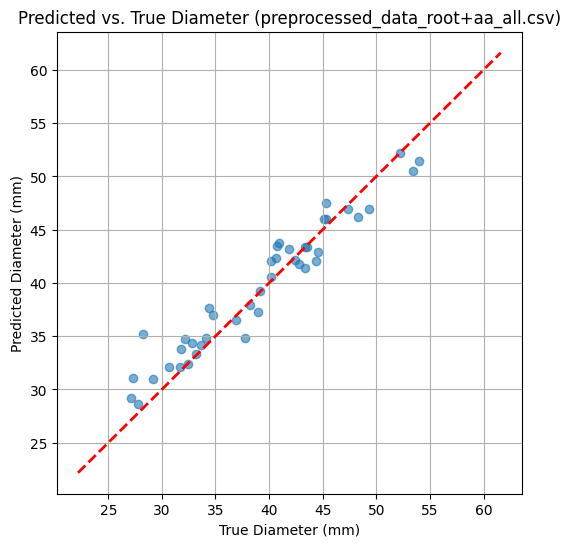

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('True Diameter (mm)')
plt.ylabel('Predicted Diameter (mm)')
plt.title(f'Predicted vs. True Diameter ({selected_file})')
plt.grid(True)
plt.show()

## 5. Save Model

In [5]:
model_path = f"models/xgb_regressor_{selected_file.split('.')[0]}.joblib"
joblib.dump(model, model_path)
print(f"Model saved to {model_path} for dataset: {selected_file}")

Model saved to models/xgb_regressor_preprocessed_data_root+aa_all.joblib for dataset: preprocessed_data_root+aa_all.csv
